In [1]:
def plot(x, y, x_model, y_model):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5.5))
    ax[0].plot(x, y, label='Data')
    ax[1].plot(x_model, y_model, label='SINDy')
    ax[0].set(xlabel='x', ylabel='y')
    ax[1].set(xlabel='x', ylabel='y')
    ax[0].legend()
    ax[1].legend()

# Using PySINDy to identify 2nd order differential systems

In the first underlying cell, the necessary imports and definitions are made.

In [2]:
import pysindy as ps
import numpy as np
import matplotlib.pyplot as plt
from pysindy.feature_library import ConcatLibrary, CustomLibrary

x = np.load('t_earth_pos.npy')
v = np.load('t_earth_vel.npy')
a = np.load('t_earth_acc.npy')

t = np.arange(0, x.shape[0], 1) # timesteps in days

functions = [lambda x,y : x/(x**2+y**2)**(3/2), lambda x,y : y/(x**2+y**2)**(3/2)] # The specific functions we're looking for
lib_custom = CustomLibrary(library_functions=functions) # defines the custom library we want to use

## Model identification

The following cell includes the model optimization and model identification. 

In [6]:
optimizer = ps.STLSQ(threshold=1)

model = ps.SINDy( 
        feature_library = lib_custom, 
        optimizer=optimizer,
        feature_names = ['x', 'y'])

xd = np.gradient(x[:, 0], t)
yd = np.gradient(x[:, 1], t)
dot = np.array([xd, yd]).T # .T is to transpose the array


model.fit(x, t=t, x_dot=a)
model.print()
coef = model.coefficients()
print(coef)

x' = -39.476 f0(x,y)
y' = -39.477 f1(x,y)
[[-39.47601536   0.        ]
 [  0.         -39.47719787]]


## Data analysis

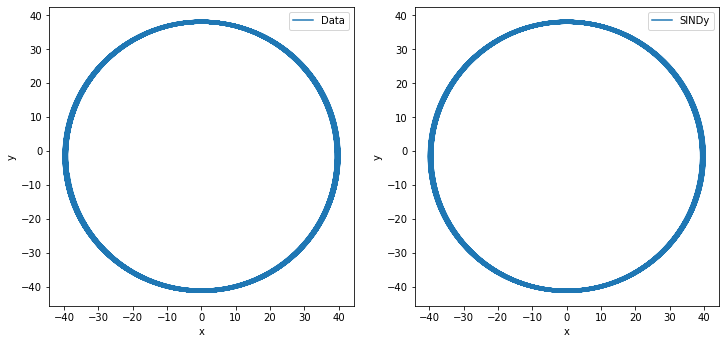

In [4]:
def f0(x, y):
    F0 = x/(x**2+y**2)**(3/2)
    return F0
    
def f1(x, y):
    F1 = y/(x**2+y**2)**(3/2)
    return F1

a_x, a_y = coef[0,0]*f0(x[:, 0], x[:, 1]), coef[1,1]*f1(x[:, 0], x[:, 1])

plot(a[:, 0], a[:, 1], a_x, a_y)